In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

sns.set_style('whitegrid')

In [2]:
hello = tf.constant('Hello world')

In [3]:
sess = tf.Session()

In [4]:
sess.run(hello)

b'Hello world'

In [4]:
class Operation:
    
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
    
    def compute(self):
        pass

In [5]:
class add(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.input = [x_var, y_var]
        return x_var + y_var

In [6]:
class multiply(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.input = [x_var, y_var]
        return x_var * y_var

In [7]:
class matmul(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.input = [x_var, y_var]
        return x_var.dot(y_var)

In [16]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [9]:
class Variable():
    
    def __init__(self, initial_value=None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [11]:
class Graph(): 
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
    
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [12]:
g = Graph()

In [13]:
g.set_as_default()

In [36]:
A = Variable(10)
b = Variable(1)

In [37]:
x = Placeholder()

In [38]:
y = multiply(A, x)

In [39]:
z = add(y, b)

In [40]:
def traverse_postorder(operation):
    nodes_postorder = []
    
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    
    recurse(operation)
    return nodes_postorder

In [59]:
class Session():
    
    def run(self, operation, feed_dict={}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                node.output = feed_dict[node]
            
            elif type(node) == Variable:
                node.output = node.value
            
            else:
                # Operations
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
            
            if type(node.output) == list:
                node.output = np.array(node.output)
                 
        return operation.output

In [60]:
sess = Session()

In [61]:
results = sess.run(operation=z, feed_dict={x:10})

In [62]:
results

101

In [63]:
g = Graph()

g.set_as_default()

A = Variable([[10, 20], [30, 40]])
b = Variable([1, 2])

x = Placeholder()

y = matmul(A, x)

z = add(y, b)

In [64]:
sess = Session()

In [65]:
sess.run(operation=z, feed_dict={x:10})

array([[101, 202],
       [301, 402]])

In [67]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [68]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)

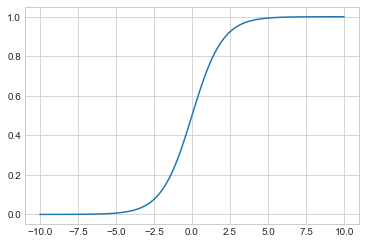

In [71]:
plt.plot(sample_z, sample_a);

In [72]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        
        super().__init__([z])
    
    def compute(self, z_val):
        return 1 / (1 + np.exp(-z_val))

In [73]:
from sklearn.datasets import make_blobs

In [74]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

In [75]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [76]:
type(data)

tuple

In [77]:
data[1]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1])

In [78]:
features = data[0]
labels = data[1]

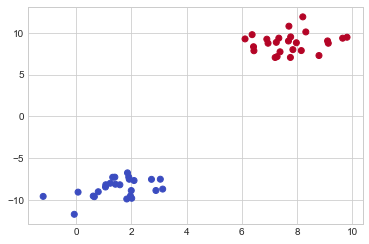

In [81]:
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')